In [3]:
import re

In [4]:
logFilePath = './飞行日志9.17_300ms.txt'

In [5]:
class Point:
    def __init__(self, lat=0, lon=0, alt=0):
        self.lat = lat
        self.lon = lon
        self.alt = alt

In [8]:
points = []

with open(logFilePath) as f:
    pat = re.compile(r'[0-9]+(?:\.[0-9]+)?')
    while True:
        s = f.readline()
        if not s:
            break
        else:
            if 'lat' in s:
                l = pat.findall(s)
                lat, lon, alt, num = l
                points.append(Point(lat, lon, alt))
                print(l)
print(len(points))

['22.80285245225086', '114.29617181165247', '29.303615541846597', '26']
['22.802587659373383', '114.2960247323315', '25.640433138529303', '87']
['22.80260859402758', '114.29602060384508', '24.784261855938105', '87']
['22.803022418157664', '114.29619026597716', '15.430910290568727', '21']
['22.80299782720397', '114.29619847829805', '15.297659262800355', '32']
['22.802966677958572', '114.29620550197936', '15.16492753861344', '32']
['22.80253454310082', '114.29594013132737', '14.621275496018598', '32']
['22.779967459456202', '114.29080375782632', '70.957720958089', '64']
['22.80209902462957', '114.29617392539285', '14.886683824063084', '64']
['22.799511480226784', '114.30709129026764', '93.06083426284556', '32']
['22.802333204947445', '114.2993185325031', '33.96051346333479', '32']
['22.80321432715209', '114.29438960058906', '6.320756447468739', '32']
['22.802781095655334', '114.29611660163278', '13.94984698503746', '32']
['22.802896337505672', '114.29616166430333', '17.31226591928214', '

In [26]:
ys = []
xs = []
with open(logFilePath) as f:
    while True:
        s = f.readline()
        if not s:
            break
        else:
            if s[0] == 'l':
                index = s.index('a')
                xs.append(float(s[index+4:index+16]))
                index = s.index('o')
                ys.append(float(s[index+4:index+16]))
print(xs)
print(ys)
            
        
    

[22.591709412, 22.592093002, 22.592013862, 22.592000643, 22.59197906, 22.59198195, 22.591978251, 22.591843692, 22.591705118, 22.591314798, 22.590831179, 22.589543968, 22.592396024, 22.59161675, 22.591613113, 22.591630264, 22.591598511, 22.591640341, 22.591753002, 22.592047019, 22.592337387, 22.592354195, 22.592033298, 22.592009259, 22.592378011, 22.591731904, 22.591885, 22.591768307, 22.591684087, 22.591601287]
[113.96215386, 113.9628749, 113.96241889, 113.96239948, 113.96238263, 113.96238369, 113.96239038, 113.96242601, 113.9624545, 113.9625666, 113.96290749, 113.96460942, 113.96010245, 113.96234438, 113.96236347, 113.96237904, 113.96234377, 113.9623766, 113.962471, 113.96232389, 113.96236123, 113.96227927, 113.96231903, 113.96230386, 113.96237084, 113.96233011, 113.96233453, 113.9623143, 113.96213134, 113.96269604]


In [27]:
stableXs = []
stableYs = []
with open(logFilePath) as f:
    while True:
        s = f.readline()
        if not s:
            break
        else:
            if s[0] == '坐':
                stableXs.append(float(s[8:26]))
                stableYs.append(float(s[-12:]))
print(stableXs)
print(stableYs)

[]
[]


In [28]:
import math
import numpy as np
points = [(xs[i], ys[i]) for i in range(len(xs))]

def distance(a, b):
    return math.sqrt((a[1] - b[1])**2 + (a[0] - b[0])**2)

def mean(points, length):
    x = y = 0
    for i in range(length):
        x += points[i][0]
        y += points[i][1]
    return x/length, y/length

def center(points, iteration=1000):
    """
        points (list of tuples)
    """
    if not points: return None
    old_center = points[0]
    length = math.ceil(len(points)*2/3)
    while iteration > 0:
        iteration -= 1
        points.sort(key=lambda p: distance(p, old_center))
        new_center = mean(points, length)
        if old_center == new_center:
            return new_center
        old_center = new_center
        
center(points)

(22.5918269378, 113.96236067100001)

In [29]:
x=y=0
x+=1
x,y

(1, 0)

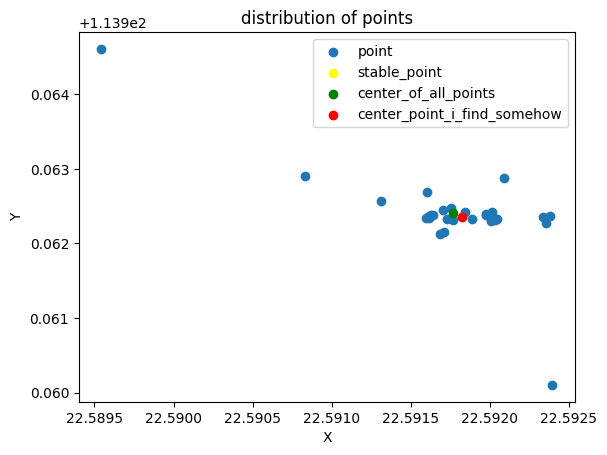

In [30]:
import matplotlib.pyplot as plt


# 创建一个新的图形
plt.figure()

# 绘制点
plt.scatter(xs, ys, label='point')
plt.scatter(stableXs, stableYs, label='stable_point', color='yellow')
plt.scatter(*mean(points, len(points)), label='center_of_all_points', color='green')
plt.scatter(*center(points), label='center_point_i_find_somehow', color='red')

# 设置图形的标题和坐标轴标签
plt.title('distribution of points')
plt.xlabel('X')
plt.ylabel('Y')

# 添加图例
plt.legend()

# # 设置X轴和Y轴的刻度范围
# plt.xlim(22.59195 - 0.0001, 22.59195 + 0.0001)
# plt.ylim(113.9621 - 0.0001, 113.9621 + 0.0001)

# 显示图形
plt.show()